# Planning

### Project Overview

The goal of this project is to build a Linear Regression model to predict medical aid charges for clients, based on lifestyle and demographic features such as age, sex, BMI, smoking habits, number of children, and geographical region.

The dataset we’ll use is based on medical charges in the United States, but we are using it as a proof-of-concept for a South African medical aid provider. The model will help assess whether dynamic pricing based on client characteristics can be feasibly implemented.

### What Is Linear Regression?

Linear regression is a supervised machine learning algorithm which uses labelled datasets to learn and create the best-fitting linear function for mapping data points. This function can then be used to make predictions on new data. The algorithm identifies the linear relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. Its primary goal is to predict continuous output values based on the input features.

# Code Analysis

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


Importing Dataset

In [2]:
df = pd.read_csv("insurance.csv")

Looking at the first 5 records in the dataset

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Checking dataset structure

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Summary statistics

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Check if any null values in the dataset

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Visualize distributions of numeric variables

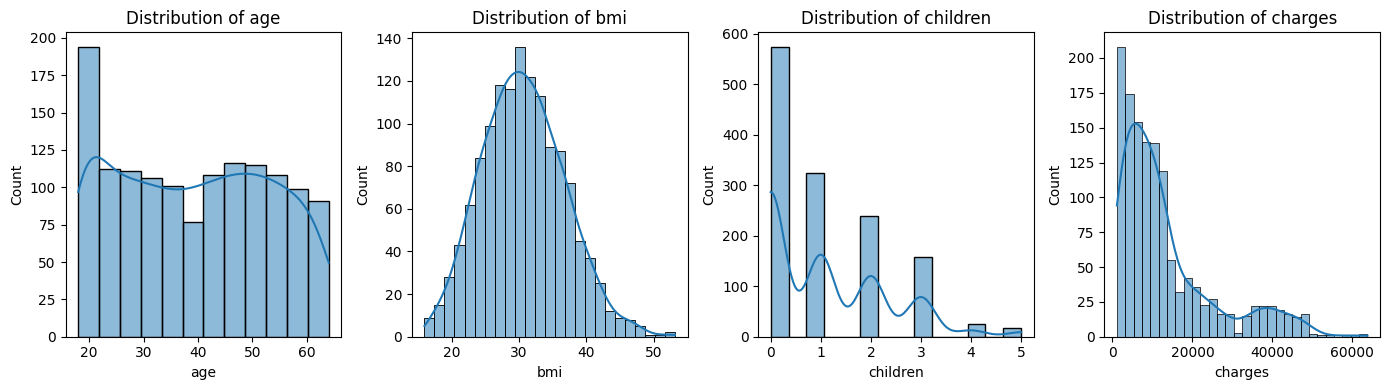

In [7]:
plt.figure(figsize=(14, 4))
for i, col in enumerate(['age', 'bmi', 'children', 'charges']):
    plt.subplot(1, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


Boxplots for charges against categorical variables

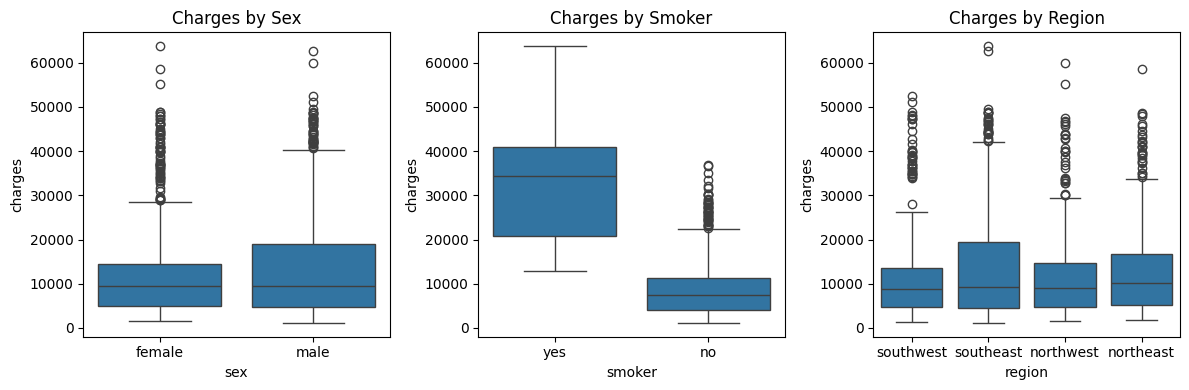

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='sex', y='charges', data=df)
plt.title("Charges by Sex")

plt.subplot(1, 3, 2)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges by Smoker")

plt.subplot(1, 3, 3)
sns.boxplot(x='region', y='charges', data=df)
plt.title("Charges by Region")

plt.tight_layout()
plt.show()


Correlation heatmap 

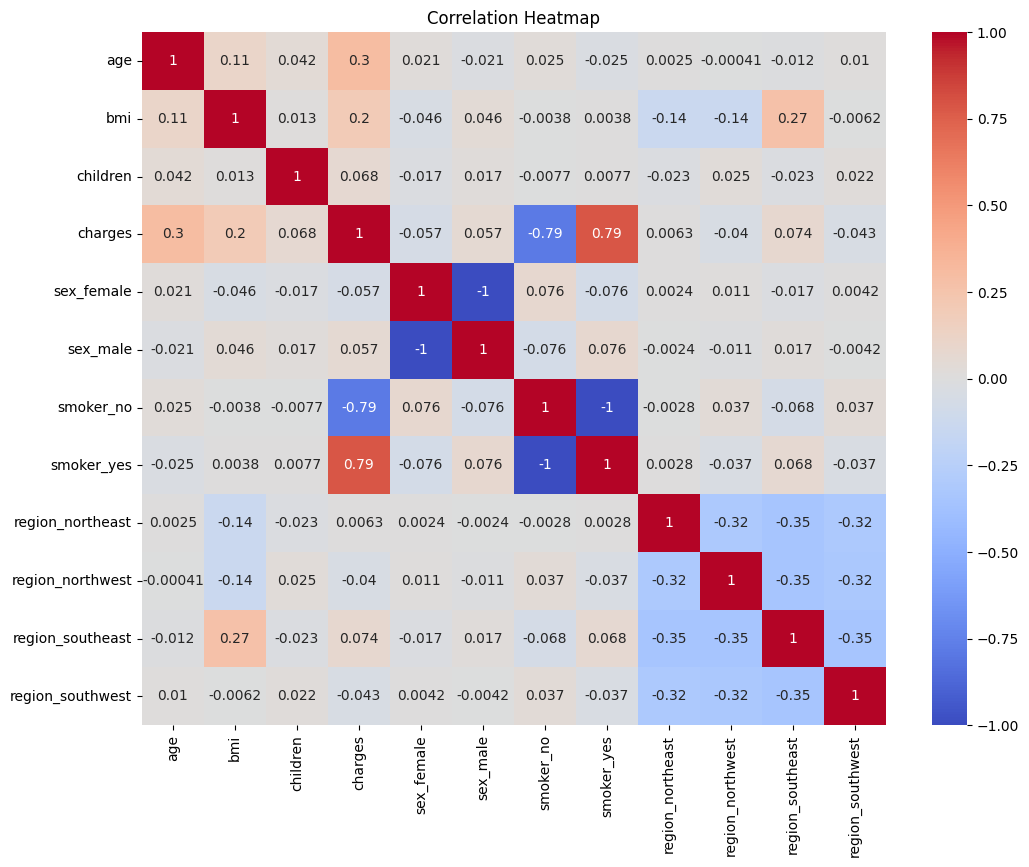

In [9]:

#Code attribution
#author
#title
#available at: https://www.youtube.com/watch?v=rsyrZnZ8J2o  https://www.youtube.com/watch?v=x_GZgeLJU4g

# Select categorical columns
cat_cols = df.select_dtypes('object').columns.tolist()

# Initialize and fit the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(df[cat_cols])

# Transform categorical variables
encoded_cols = encoder.get_feature_names_out(cat_cols)
df[encoded_cols] = encoder.transform(df[cat_cols])

# Drop original categorical columns
df.drop(columns=cat_cols, inplace=True)

plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Defining features and target values and training the model

In [10]:
X = df.drop('charges', axis=1)
y = df['charges']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Make predictions

In [11]:
y_pred = model.predict(X_test)

Evaluating the model

In [12]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) 

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R² Score: 0.7836
Mean Absolute Error: 4181.19
Mean Squared Error: 33596915.85


Actual vs Predicted Plot using seaborn and matplotlib

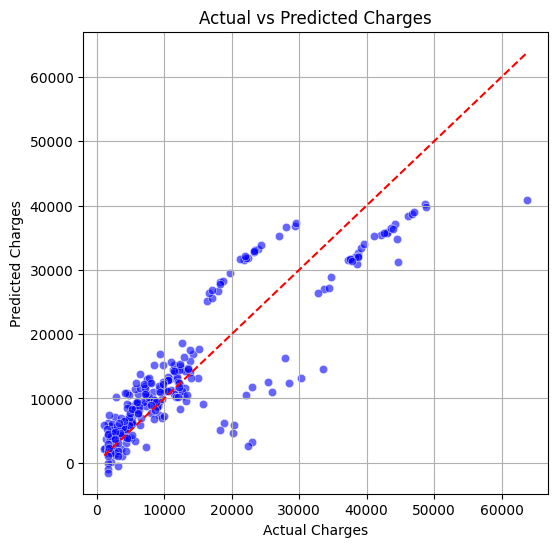

In [13]:
#Code Attribution
#Author: Léonard
#Title: How to show min and max values at the end of the axes
#Available at: https://stackoverflow.com/questions/64321561/how-to-show-min-and-max-values-at-the-end-of-the-axes
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.grid(True)
plt.show()


## Reference List


Geeksforgeeks.org. (2025). ML | Linear Regression - GeeksforGeeks. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/ml-linear-regression/.

Léonard. (2020). How to show min and max values at the end of the axes. [online] Stack Overflow. Available at: https://stackoverflow.com/questions/64321561/how-to-show-min-and-max-values-at-the-end-of-the-axes.

‌